# Project: Wrangling and Analyze Data

In [1]:
#import all neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
tweet_image_request =requests.get(url)

# Save HTML to file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(tweet_image_request.content)
    
# Create dataframe from image_predictions.tsv 
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive['tweet_id']

In [5]:
exceptions=[]
with open('tweet_json.txt', 'w') as outfile:
    for id in tweet_ids:
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')        
        except Exception as e:
            exceptions.append(e)

Rate limit reached. Sleeping for: 781
Rate limit reached. Sleeping for: 782


In [6]:
selected_attr = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id':json_data['id_str'],
                              'retweet_count': json_data['retweet_count'],
                              'favourite_count':json_data['favorite_count']
        }
        )

tweet_json = pd.DataFrame(selected_attr, columns = ['tweet_id',
                                                   'retweet_count',
                                                   'favourite_count'])
tweet_json

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7117,34240
1,892177421306343426,5359,29677
2,891815181378084864,3526,22351
3,891689557279858688,7308,37383
4,891327558926688256,7862,35723
...,...,...,...
2323,666049248165822465,37,91
2324,666044226329800704,117,251
2325,666033412701032449,36,102
2326,666029285002620928,39,115


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1215,715009755312439296,NaN,NaN,2016-03-30 02:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Siba. She's remarkably mobile. Very sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715009755...,12,10,Siba,None,None,None,None
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None


In [8]:
image_predictions.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1303,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland_sheepdog,0.018142,True
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/72983...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False


In [9]:
tweet_json.sample(4)

,tweet_id,retweet_count,favourite_count
1018,743595368194129920,6043,17195
1640,682662431982772225,1003,2856
969,748337862848962560,3800,7156
38,884876753390489601,4726,24700


> #### Checking twitter_archive data

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

>- **tweet_id column datatype need to be change to sting.**
>- **rating_numerator column datatype need to be change to float.**
>- **rating_denominator column datatype need to be change to float.**
>- **timestamp column datatype need to be change to datetime.**

In [11]:
#Checking Null Values
print("Checking Null Value in Twitter Archive\n",twitter_archive.isnull().sum())

Checking Null Value in Twitter Archive
 tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


> **As per requirement we don't need to analysis Reweet data. In our dataset reweets columns have lots of Null values so we need to remove all columns with retweet information.**

In [12]:
# Checking Duplicate Values

print("Checking Duplicate Value of Tweet ID in Twitter Archive",twitter_archive.tweet_id.duplicated().sum())

Checking Duplicate Value of Tweet ID in Twitter Archive 0


In [13]:
print("Checking Duplicate Value of Name in Twitter Archive\n",twitter_archive.name.value_counts())

Checking Duplicate Value of Name in Twitter Archive
 None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64


In [14]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


>- **More than 700 Dog Name is 'None' and More than 50 Dogs Name is 'a'**
>- **"Doggo', 'Floofer', 'Pipper', 'Puppo' columns contains None instead of NaN**
>- **Need to combine 4 Columns(dog stages) and Make it one.** Tidiness

In [16]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

>- **rating_numerator & rating_denominator values are incorrect** (Correct values are available in Text column)

In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

>- **It is difficult to read source value.**

> ### Checking Image Predictions Dataset

In [19]:
image_predictions.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
928,702684942141153280,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True


>- **P1, P2 and P3 have inconsisitent capital words.**
>- **P1, p2 and P3 have unnessary underscore instead of space.**
>- **p1,p1_conf,p1_dog column names are not understandable** //Tidiness

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> **tweet_id column datatype need to be change to sting.**

In [21]:
#Checking Null Values
print("Checking Null Value in Image Prediction \n",image_predictions.isnull().sum())

Checking Null Value in Image Prediction 
 tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [22]:
#Duplicate Value
print("Checking Duplicate Value of Tweet Id in image predictions: ",image_predictions.tweet_id.duplicated().sum())
print("Checking Duplicate Value of Jpg URL in image predictions: ",image_predictions.jpg_url.duplicated().sum())

image_predictions[image_predictions.jpg_url.duplicated()]

Checking Duplicate Value of Tweet Id in image predictions:  0
Checking Duplicate Value of Jpg URL in image predictions:  66


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


> **jpg_url have dupliacte entries.**

In [23]:
print("Image Num Count\n", image_predictions.img_num.value_counts())

Image Num Count
 1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64


In [24]:
print(image_predictions.p1_conf.value_counts()) #Checking p1 conf should be not be more than 1 
print(image_predictions.p2_conf.value_counts()) #Checking p2 conf should be not be more than 1
print(image_predictions.p3_conf.value_counts()) #Checking p3 conf should be not be more than 1

0.721188    2
0.676439    2
0.505370    2
0.777468    2
0.254856    2
           ..
0.141432    1
0.722218    1
0.278600    1
0.375610    1
0.097049    1
Name: p1_conf, Length: 2006, dtype: int64
0.069362    3
0.001186    2
0.181351    2
0.016641    2
0.112943    2
           ..
0.053008    1
0.094044    1
0.193804    1
0.155207    1
0.085851    1
Name: p2_conf, Length: 2004, dtype: int64
0.023353    2
0.046403    2
0.077008    2
0.017492    2
0.223263    2
           ..
0.037881    1
0.085237    1
0.055194    1
0.153598    1
0.076110    1
Name: p3_conf, Length: 2006, dtype: int64


> #### Checking Tweet Json Dataset

In [25]:
tweet_json.sample(6)

,tweet_id,retweet_count,favourite_count
2065,670780561024270336,257,716
122,867900495410671616,3620,21871
262,840696689258311684,901,11631
42,884162670584377345,2523,18162
43,883838122936631299,2901,19427
818,766793450729734144,1274,4815


In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2328 non-null   object
 1   retweet_count    2328 non-null   int64 
 2   favourite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [27]:
#Checking Null value
print("Checking Null Value in Json Tweet \n",tweet_json.isnull().sum())

Checking Null Value in Json Tweet 
 tweet_id           0
retweet_count      0
favourite_count    0
dtype: int64


In [28]:
#tweet_json
print("Checking Duplicate Value of Tweet ID in tweet_json\n",tweet_json.tweet_id.value_counts().sort_values())

Checking Duplicate Value of Tweet ID in tweet_json
 892420643555336193    1
888804989199671297    1
890609185150312448    1
891815181378084864    1
891689557279858688    1
                     ..
666050758794694657    1
666049248165822465    1
666044226329800704    1
666273097616637952    1
666020888022790149    1
Name: tweet_id, Length: 2328, dtype: int64


In [29]:
tweet_json.retweet_count.value_counts()

480     5
81      5
465     5
208     5
203     4
       ..
1520    1
3635    1
1680    1
2767    1
117     1
Name: retweet_count, Length: 1657, dtype: int64

In [30]:
tweet_json.favourite_count.value_counts()
tweet_json[tweet_json['favourite_count']==0]

,tweet_id,retweet_count,favourite_count
31,886054160059072513,93,0
35,885311592912609280,15659,0
67,879130579576475649,5809,0
72,878404777348136964,1084,0
73,878316110768087041,5614,0
...,...,...,...
996,746521445350707200,914,0
1016,743835915802583040,1905,0
1215,711998809858043904,122,0
2231,667550904950915073,29,0


In [31]:
#Tidiness
all_columns=pd.Series(list(twitter_archive)+list(image_predictions)+list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

 > **Join Twitter_json table with the twitter_archive table.**

### Quality Issues
##### Twitter Archieve:
1. tweet_id column datatype need to be change to sting.

1. timestamp column datatype need to be change to datetime.

1. As per requirement we don't need to analysis Reweet data. In our dataset reweets columns have lots of Null values so we need to remove all columns with retweet information.

1. It is difficult to read source value.

1.  "Doggo', 'Floofer', 'Pipper', 'Puppo' columns contains None instead of NaN

1. rating_numerator & rating_denominator values are incorrect

1. More than 700 Dog Name is 'None' and More than 50 Dogs Name is 'a'


##### Image Predictions:
1. P1, P2 and P3 have inconsisitent capital words.

1. P1, p2 and P3 have unnessary underscore instead of space.

1. tweet_id column datatype need to be change to sting.

1. jpg_url have dupliacte entries.

### Tidiness Issues

1. Need to combine 4 Columns(dog stages) and Make it one. (Twitter Archive)

1. Join Tweet Json & Image Predictions datasets with the twitter_archive. (Tweet Json)

1. p1 column name is not descriptive. (Image Predictions)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1 - #2:

#### Define: 

> ##### Correcting Datatype of Twitter Archieve Dataset.
> 1. tweet_id column datatype need to be change to sting.
> 1. timestamp column datatype need to be change to datetime.

#### Code

In [33]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
119,869772420881756160,NaN,NaN,2017-05-31 04:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dewey (pronounced ""covfefe""). He's hav...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/869772420...,13,10,Dewey,None,None,None,None


In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype('str') #changing tweet_id to String
twitter_archive_clean.timestamp=twitter_archive_clean.timestamp.astype('datetime64') #Changing Timestamp to Datetime

In [36]:
#Making Seprate column for Date and Time.

twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M:%S'))

In [37]:
twitter_archive_clean.date=twitter_archive_clean.date.astype('datetime64')
twitter_archive_clean.time=twitter_archive_clean.time.astype('datetime64')

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [39]:
twitter_archive_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Issue #3:

#### Define

> As per requirement we don't need to analysis Retweet data so first we will remove all retweet from dataset after that we will remove all unnecessary columns. 
> <br>We don't need these columns so removing columns from dataset. 
> timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'

#### Code

In [40]:
total_values=twitter_archive_clean.shape[0]
retweeted_count=(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()== True]).shape[0]
print("Out of {}, only {} values are retweeted.".format(total_values,retweeted_count))

Out of 2356, only 181 values are retweeted.


In [41]:
# removing retweet from dataframe
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()== True]
                           .index, inplace= True)

In [42]:
total_values=twitter_archive_clean.shape[0]
retweeted_count=(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()== True]).shape[0]

print("Out of {}, only {} values are retweeted.".format(total_values,retweeted_count))

Out of 2175, only 0 values are retweeted.


In [43]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time'],
      dtype='object')

In [44]:
unnecessary_columns=['timestamp','in_reply_to_status_id',
                     'in_reply_to_user_id',
                     'retweeted_status_id', 
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp',
                     'expanded_urls']

twitter_archive_clean.drop(unnecessary_columns,axis=1,inplace=True)

#### Test

In [45]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'date', 'time'],
      dtype='object')

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
 10  date                2175 non-null   datetime64[ns]
 11  time                2175 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 220.9+ KB


### Issue #4:

#### Define

> In the source column full hyperlink tag information is available which is bit difficult to understand. We can replace hyperlink tag with Link name only.

#### Code

In [47]:
# Source data

twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [48]:
twitter_for_iPhone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
twitter_web_client= '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
vine_make_a_scene = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
tweetDeck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

twitter_archive_clean.source.loc[twitter_archive_clean.source == twitter_for_iPhone]='Twitter for iPhone'
twitter_archive_clean.source.loc[twitter_archive_clean.source == twitter_web_client]='Twitter Web Client'
twitter_archive_clean.source.loc[twitter_archive_clean.source == vine_make_a_scene] ='Vine - Make a Scene'
twitter_archive_clean.source.loc[twitter_archive_clean.source == tweetDeck] = 'TweetDeck'

C:\Users\nihar\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Test

In [49]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #5:

#### Define

> "Doggo', 'Floofer', 'Pupper', 'Puppo' columns contains None. It should be NaN. With the help of Numpy convertung None Value to NaN.

#### Code

In [50]:
doggo_count=twitter_archive_clean.doggo.value_counts()
print("There are {} entries in the Doggo Column before replacing.".format(doggo_count[0]))

floofer_count=twitter_archive_clean.floofer.value_counts()
print("There are {} entries in the Floofer Column before replacing.".format(floofer_count[0]))

pupper_count=twitter_archive_clean.pupper.value_counts()
print("There are {} entries in the Pupper Column before replacing.".format(pupper_count[0]))

puppo_count=twitter_archive_clean.puppo.value_counts()
print("There are {} entries in the Puppo Column before replacing.".format(puppo_count[0]))

There are 2088 entries in the Doggo Column before replacing.
There are 2165 entries in the Floofer Column before replacing.
There are 1941 entries in the Pupper Column before replacing.
There are 2150 entries in the Puppo Column before replacing.


In [51]:
twitter_archive_clean.doggo.replace(to_replace='None', value=np.nan, inplace=True)
twitter_archive_clean.floofer.replace(to_replace='None', value=np.nan, inplace=True)
twitter_archive_clean.pupper.replace(to_replace='None', value=np.nan, inplace=True)
twitter_archive_clean.puppo.replace(to_replace='None', value=np.nan, inplace=True)

#### Test

In [52]:
doggo_count=twitter_archive_clean.doggo.value_counts()
print("There are {} entries in the Doggo Column after replacing None to NaN.".format(doggo_count[0]))

floofer_count=twitter_archive_clean.floofer.value_counts()
print("There are {} entries in the Floofer Column after replacing None to NaN.".format(floofer_count[0]))

pupper_count=twitter_archive_clean.pupper.value_counts()
print("There are {} entries in the Pupper Column after replacing None to NaN.".format(pupper_count[0]))

puppo_count=twitter_archive_clean.puppo.value_counts()
print("There are {} entries in the Puppo Column after replacing None to NaN.".format(puppo_count[0]))

There are 87 entries in the Doggo Column after replacing None to NaN.
There are 10 entries in the Floofer Column after replacing None to NaN.
There are 234 entries in the Pupper Column after replacing None to NaN.
There are 25 entries in the Puppo Column after replacing None to NaN.


In [53]:
twitter_archive_clean.sample(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
549,805207613751304193,Twitter for iPhone,This is Shooter. He's doing quite the snowy zo...,12,10,Shooter,NaN,NaN,NaN,NaN,2016-12-04,2022-01-11 00:30:29
2008,672256522047614977,Twitter for iPhone,Mighty rare dogs here. Long smooth necks. Grea...,8,10,None,NaN,NaN,NaN,NaN,2015-12-03,2022-01-11 03:30:19
1857,675517828909424640,Twitter for iPhone,12/10 stay woke https://t.co/XDiQw4Akiw,12,10,None,NaN,NaN,NaN,NaN,2015-12-12,2022-01-11 03:29:35
1540,689659372465688576,Twitter for iPhone,This is Ricky. He's being escorted out of the ...,8,10,Ricky,NaN,NaN,NaN,NaN,2016-01-20,2022-01-11 04:03:02


### Issue #6:

#### Define

> As per requirement rating numerator should be between 10-15 and denominator should be 10. But in dataset rating_numerator value range is 0-1776 and denominator values are 0-170.
> <br>Text column conatins rating for each dog. We need to extract correct value from Text column. I am doing this activity manually after exporting effected data in excel sheet.

#### Code

In [54]:
print("Min and Max values for Numerators columns are {}, {}.".
      format(twitter_archive_clean.rating_numerator.min(),twitter_archive_clean.rating_numerator.max()))


print("Min and Max values for Denominator columns are {}, {}.".
      format(twitter_archive_clean.rating_denominator.min(),twitter_archive_clean.rating_denominator.max()))

twitter_archive_clean[["rating_numerator", "rating_denominator"]].describe()

Min and Max values for Numerators columns are 0, 1776.
Min and Max values for Denominator columns are 0, 170.


,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,13.215172,10.492874
std,47.725696,7.019084
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [55]:
# Checking Denominator Values

mismatch_demonirator=twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
correct_demonirator=twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

print("Out of {}, only {} have incorrect Denominator and {} have correct.".format(total_values,mismatch_demonirator.count()[0],correct_demonirator.count()[0]))

Out of 2175, only 22 have incorrect Denominator and 2153 have correct.


In [56]:
mismatch_demonirator.sort_values(by="rating_numerator", ascending=False)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
313,835246439529840640,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,NaN,NaN,NaN,NaN,2017-02-24,2022-01-11 21:54:03
1120,731156023742988288,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,204,170,this,NaN,NaN,NaN,NaN,2016-05-13,2022-01-11 16:15:54
902,758467244762497024,Twitter for iPhone,Why does this never happen at my front door......,165,150,None,NaN,NaN,NaN,NaN,2016-07-28,2022-01-11 01:00:57
1779,677716515794329600,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,NaN,NaN,NaN,NaN,2015-12-18,2022-01-11 05:06:23
1634,684225744407494656,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",143,130,None,NaN,NaN,NaN,NaN,2016-01-05,2022-01-11 04:11:44
1635,684222868335505415,Twitter for iPhone,Someone help the girl is being mugged. Several...,121,110,None,NaN,NaN,NaN,NaN,2016-01-05,2022-01-11 04:00:18
1228,713900603437621249,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,NaN,NaN,NaN,NaN,2016-03-27,2022-01-11 01:29:02
1843,675853064436391936,Twitter for iPhone,Here we have an entire platoon of puppers. Tot...,88,80,None,NaN,NaN,NaN,NaN,2015-12-13,2022-01-11 01:41:41
433,820690176645140481,Twitter for iPhone,The floofs have been released I repeat the flo...,84,70,None,NaN,NaN,NaN,NaN,2017-01-15,2022-01-11 17:52:40
1254,710658690886586372,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,80,80,None,NaN,NaN,NaN,NaN,2016-03-18,2022-01-11 02:46:49


> <br>**Note:** After examining the spreadsheet, I could identify 3 error-types within the 18 entries with irregular denominators:
>1. 13 entries had rating based on no of dogs
>1. 5 entries had incorrect ratings
>1. 4 entry had no rating at all

>**Cleaning method:** I did not find how to correct programatically so I updated excel sheet manually by add new updated values in new column **"new_rating_numerator"** also updating denominator value to 10 under **"new_rating_denominator"** column.
>1. Use a simple cross-multiplication method (numerator*10/denominator) to normalize the numerator.
>1. Manually enter the ratings using text column which has correct data.
>1. Manually enter the rating using the median which is 11.0

In [57]:
#Fetching only values that are not equal to 10 and exporting in Excel Sheet.

twitter_archive_clean_denominator=twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
twitter_archive_clean_denominator.to_excel('incorrect_deno.xlsx')

In [58]:
#Importing updated excel sheet after updating all incorrect values manually.

corr_denominator = pd.read_excel('incorrect_deno_updated.xlsx', index_col=0)

In [59]:
# Only change the values at the corr_denominator index
twitter_archive_clean.loc[corr_denominator.index, 'rating_numerator'] = corr_denominator.loc[corr_denominator.index, 'new_rating_numerator']
twitter_archive_clean.loc[corr_denominator.index, 'rating_denominator'] = corr_denominator.loc[corr_denominator.index, "new_rating_denominator"]

In [60]:
#Checking all updated value in main dataset
twitter_archive_clean.loc[corr_denominator.index, ['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,13,10
342,11,10
433,12,10
516,11,10
902,11,10
1068,14,10
1120,12,10
1165,13,10
1202,10,10
1228,11,10


In [61]:
corr_denominator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 313 to 2335
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                22 non-null     float64
 1   source                  22 non-null     object 
 2   text                    22 non-null     object 
 3   rating_numerator        22 non-null     int64  
 4   rating_denominator      22 non-null     int64  
 5   name                    22 non-null     object 
 6   doggo                   0 non-null      float64
 7   floofer                 0 non-null      float64
 8   pupper                  0 non-null      float64
 9   puppo                   0 non-null      float64
 10  new_rating_numerator    22 non-null     int64  
 11  new_rating_denominator  22 non-null     int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 2.8+ KB


In [62]:
# Checking Denominator Values after updating incorrect values

mismatch_demonirator=twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
correct_demonirator=twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

print("After updating incoorect values, Out of {}, only {} have incorrect Denominator and {} have correct.".format(total_values,mismatch_demonirator.count()[0],correct_demonirator.count()[0]))

After updating incoorect values, Out of 2175, only 0 have incorrect Denominator and 2175 have correct.


In [63]:
# Checking Numerator Values

mismatch_numerator=twitter_archive_clean[(twitter_archive_clean['rating_numerator'] > 15)]
correct_numerator=twitter_archive_clean[(twitter_archive_clean['rating_numerator']<=15)]

print("Out of {}, only {} have incorrect Numerator and {} have correct.".format(total_values,mismatch_numerator.count()[0],correct_numerator.count()[0]))

Out of 2175, only 9 have incorrect Numerator and 2166 have correct.


In [64]:
mismatch_numerator.sort_values(by="rating_numerator", ascending=False)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
979,749981277374128128,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,NaN,NaN,NaN,NaN,2016-07-04,2022-01-11 15:00:45
189,855860136149123072,Twitter for iPhone,@s8n You tried very hard to portray this good ...,666,10,None,NaN,NaN,NaN,NaN,2017-04-22,2022-01-11 19:05:32
188,855862651834028034,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,None,NaN,NaN,NaN,NaN,2017-04-22,2022-01-11 19:15:32
2074,670842764863651840,Twitter for iPhone,After so many requests... here you go.\n\nGood...,420,10,None,NaN,NaN,NaN,NaN,2015-11-29,2022-01-11 05:52:33
290,838150277551247360,Twitter for iPhone,@markhoppus 182/10,182,10,None,NaN,NaN,NaN,NaN,2017-03-04,2022-01-11 22:12:52
695,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN,NaN,NaN,NaN,2016-10-13,2022-01-11 23:23:56
763,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,NaN,NaN,pupper,NaN,2016-09-20,2022-01-11 00:24:34
1712,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of ...,26,10,None,NaN,NaN,NaN,NaN,2015-12-25,2022-01-11 21:06:00
55,881633300179243008,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,17,10,None,NaN,NaN,NaN,NaN,2017-07-02,2022-01-11 21:58:53


> <br>**Note:** After examining the spreadsheet, I could identify 3 error-types within the 9 entries with irregular numerator:
>1. 5 entries had rating based on no of dogs
>1. 4 entries had incorrect ratings

>**Cleaning method:** I did not find how to correct programatically so I updated excel sheet manually by add new updated values in new column **"new_rating_numerator"**.
>1. Use a simple cross-multiplication method (numerator*10/denominator) to normalize the numerator.
>1. Manually enter the ratings using text column which has correct data.

In [65]:
#Fetching only values that are not equal to 10 and exporting in Excel Sheet.

twitter_archive_clean_numerator=twitter_archive_clean[(twitter_archive_clean.rating_numerator > 15)]
twitter_archive_clean_numerator.to_excel('incorrect_numerator.xlsx')

In [66]:
#Importing updated excel sheet after updating all incorrect values manually.

corr_numerator = pd.read_excel('incorrect_numerator_updated.xlsx', index_col=0)

In [67]:
corr_numerator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 55 to 2074
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              9 non-null      float64
 1   source                9 non-null      object 
 2   text                  9 non-null      object 
 3   rating_numerator      9 non-null      int64  
 4   rating_denominator    9 non-null      int64  
 5   name                  9 non-null      object 
 6   doggo                 0 non-null      float64
 7   floofer               0 non-null      float64
 8   pupper                1 non-null      object 
 9   puppo                 0 non-null      float64
 10  new_rating_numerator  9 non-null      int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 864.0+ bytes


In [68]:
# Only change the values at the corr_numerator index

twitter_archive_clean.loc[corr_numerator.index, 'rating_numerator'] = corr_numerator.loc[corr_numerator.index, 'new_rating_numerator']

In [69]:
#Checking all updated value in main dataset

twitter_archive_clean.loc[corr_numerator.index, ['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
55,13,10
188,11,10
189,11,10
290,11,10
695,8,10
763,11,10
979,11,10
1712,11,10
2074,11,10


In [70]:
# Checking Numerator Values

mismatch_numerator=twitter_archive_clean[(twitter_archive_clean['rating_numerator'] > 15)]
correct_numerator=twitter_archive_clean[(twitter_archive_clean['rating_numerator']<=15)]

print("After updating incoorect values, Out of {}, only {} have incorrect Numerator and {} have correct.".format(total_values,mismatch_numerator.count()[0],correct_numerator.count()[0]))

After updating incoorect values, Out of 2175, only 0 have incorrect Numerator and 2175 have correct.


#### Test

In [71]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.0
mean,10.625747,10.0
std,2.185231,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,15.000000,10.0


In [72]:
twitter_archive_clean.sample(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1480,693486665285931008,Twitter for iPhone,This is Lincoln. He doesn't understand his new...,11,10,Lincoln,NaN,NaN,NaN,NaN,2016-01-30,2022-01-11 17:31:20
1663,682808988178739200,Twitter for iPhone,"I'm aware that I could've said 20/16, but here...",11,10,None,NaN,NaN,NaN,NaN,2016-01-01,2022-01-11 06:22:03
1578,687317306314240000,Twitter for iPhone,This is Tyrone. He's a leaf wizard. Self-motiv...,11,10,Tyrone,NaN,NaN,NaN,NaN,2016-01-13,2022-01-11 16:56:30
421,821886076407029760,Twitter for iPhone,This is Jimison. He was just called a good boy...,13,10,Jimison,NaN,NaN,NaN,NaN,2017-01-19,2022-01-11 01:04:45


In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   doggo               87 non-null     object        
 7   floofer             10 non-null     object        
 8   pupper              234 non-null    object        
 9   puppo               25 non-null     object        
 10  date                2175 non-null   datetime64[ns]
 11  time                2175 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 285.4+ KB


### Issue #7:

#### Define

> More than 700 Dog Name is 'None' and More than 50 Dogs Name is 'a'
>1. First I am replacing 'None' value to 'NaN'
>1. Not able to figure out how to update "a" so leaving all values like this only.

#### Code

In [74]:
none_count=twitter_archive_clean[twitter_archive_clean.name == 'None']
print("There are {} entries in the Name Column before replacing.".format(none_count.name.count()))

There are 680 entries in the Name Column before replacing.


In [75]:
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
56,881536004380872706,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,14,10,a,NaN,NaN,pupper,NaN,2017-07-02,2022-01-11 15:32:16
649,792913359805018113,Twitter for iPhone,Here is a perfect example of someone who has t...,13,10,a,NaN,NaN,NaN,NaN,2016-10-31,2022-01-11 02:17:31
801,772581559778025472,Twitter for iPhone,Guys this is getting so out of hand. We only r...,10,10,a,NaN,NaN,NaN,NaN,2016-09-04,2022-01-11 23:46:12
1002,747885874273214464,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk...,8,10,a,NaN,NaN,NaN,NaN,2016-06-28,2022-01-11 20:14:22
1004,747816857231626240,Twitter for iPhone,Viewer discretion is advised. This is a terrib...,4,10,a,NaN,NaN,NaN,NaN,2016-06-28,2022-01-11 15:40:07
1017,746872823977771008,Twitter for iPhone,This is a carrot. We only rate dogs. Please on...,11,10,a,NaN,NaN,NaN,NaN,2016-06-26,2022-01-11 01:08:52
1049,743222593470234624,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper....,12,10,a,NaN,NaN,pupper,NaN,2016-06-15,2022-01-11 23:24:09
1193,717537687239008257,Twitter for iPhone,People please. This is a Deadly Mediterranean ...,11,10,a,NaN,NaN,NaN,NaN,2016-04-06,2022-01-11 02:21:30
1207,715733265223708672,Twitter for iPhone,This is a taco. We only rate dogs. Please only...,10,10,a,NaN,NaN,NaN,NaN,2016-04-01,2022-01-11 02:51:22
1340,704859558691414016,Twitter for iPhone,Here is a heartbreaking scene of an incredible...,10,10,a,NaN,NaN,pupper,NaN,2016-03-02,2022-01-11 02:43:09


In [76]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.nan)

#### Test

In [77]:
none_count=twitter_archive_clean[twitter_archive_clean.name == 'None']
print("There are {} entries in the Name Column after replacing.".format(none_count.name.count()))

There are 0 entries in the Name Column after replacing.


In [78]:
twitter_archive_clean.name.value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 955, dtype: int64

In [79]:
twitter_archive_clean.sample(7)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
1035,744995568523612160,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,9,10,Abby,NaN,NaN,NaN,puppo,2016-06-20,2022-01-11 20:49:19
248,845397057150107648,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,doggo,NaN,NaN,NaN,2017-03-24,2022-01-11 22:08:59
2199,668779399630725120,Twitter for iPhone,This is Kevon. He is not physically or mentall...,10,10,Kevon,NaN,NaN,NaN,NaN,2015-11-23,2022-01-11 13:13:28
1705,680836378243002368,Twitter for iPhone,This is Ellie. She's secretly ferocious. 12/10...,12,10,Ellie,NaN,NaN,pupper,NaN,2015-12-26,2022-01-11 19:43:36
1594,686377065986265092,Twitter for iPhone,Meet Birf. He thinks he's gone blind. 10/10 ve...,10,10,Birf,NaN,NaN,pupper,NaN,2016-01-11,2022-01-11 02:40:19
12,889665388333682689,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13,10,NaN,NaN,NaN,NaN,puppo,2017-07-25,2022-01-11 01:55:32
417,822489057087389700,Twitter for iPhone,This is Paisley. She really wanted to be presi...,13,10,Paisley,NaN,NaN,NaN,NaN,2017-01-20,2022-01-11 17:00:46


In [80]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                1495 non-null   object        
 6   doggo               87 non-null     object        
 7   floofer             10 non-null     object        
 8   pupper              234 non-null    object        
 9   puppo               25 non-null     object        
 10  date                2175 non-null   datetime64[ns]
 11  time                2175 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 285.4+ KB


### Issue #8:

#### Define

##### Image Predictions:
> tweet_id column datatype need to be change to sting.

#### Code

In [81]:
image_predictions_clean = image_predictions.copy()

In [82]:
dataType=image_predictions_clean.dtypes['tweet_id']
print("Datatype of Tweet Id column is: {}".format(dataType))

Datatype of Tweet Id column is: int64


In [83]:
image_predictions_clean=image_predictions_clean.astype({'tweet_id':str})

#### Test

In [84]:
dataType=image_predictions_clean.dtypes['tweet_id']
print("Datatype of Tweet Id column after changing datatype is: {}".format(dataType))

image_predictions_clean.info()

Datatype of Tweet Id column after changing datatype is: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9:

#### Define

##### Image Predictions:
>p1_conf, p1_dog, p2, p2_donf, p2_dog, p3, p3_conf, p3_dog columns are not required.


#### Code

In [85]:
list(image_predictions_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [86]:
unused_columns=[ 'img_num', 
                'p1_conf','p1_dog',
                'p2','p2_conf','p2_dog',
                'p3','p3_conf', 'p3_dog']

image_predictions_clean=image_predictions_clean.drop(unused_columns,axis=1)

#### Test

In [87]:
list(image_predictions_clean.columns)

['tweet_id', 'jpg_url', 'p1']

In [88]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   p1        2075 non-null   object
dtypes: object(3)
memory usage: 48.8+ KB


In [89]:
image_predictions_clean.sample(3)

,tweet_id,jpg_url,p1
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,desktop_computer
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,sorrel
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog


### Issue #10:

#### Define

> jpg_url have more than 60 entries with dupliacte values. So removing all duplicate values from dataset.

#### Code

In [90]:
duplicateValue_count=image_predictions_clean[image_predictions_clean.jpg_url.duplicated()].tweet_id.count()
print("There are {} duplicate jpg_url in Image Predictions dataset.".format(duplicateValue_count))

There are 66 duplicate jpg_url in Image Predictions dataset.


In [91]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [92]:
duplicateValue_count=image_predictions_clean[image_predictions_clean.jpg_url.duplicated()].tweet_id.count()
print("There are {} duplicate jpg_url in Image Predictions dataset.".format(duplicateValue_count))

There are 0 duplicate jpg_url in Image Predictions dataset.


### Issue #11:

#### Define

> P1 has inconsisitent capital words.
> <br>P1 has unnessary underscore instead of space.

#### Code

In [93]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,p1
503,675878199931371520,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,wood_rabbit
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,Tibetan_mastiff
1029,711008018775851008,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,French_bulldog
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,golden_retriever
863,697259378236399616,https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg,Great_Dane


In [94]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace("_"," ")
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()

#### Test

In [95]:
image_predictions_clean.p1.value_counts()

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
                     ... 
Lorikeet                1
Fire Engine             1
Carousel                1
Ibex                    1
Orange                  1
Name: p1, Length: 378, dtype: int64

### Issue #12:

#### Define

> p1 name is not descriptive. These are the breed of dogs so changing column name to 'breed'.

#### Code

In [96]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2009 non-null   object
 1   jpg_url   2009 non-null   object
 2   p1        2009 non-null   object
dtypes: object(3)
memory usage: 62.8+ KB


In [97]:
image_predictions_clean = image_predictions_clean.rename(columns={"p1":"breed"})

#### Test

In [98]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2009 non-null   object
 1   jpg_url   2009 non-null   object
 2   breed     2009 non-null   object
dtypes: object(3)
memory usage: 62.8+ KB


### Tidiness #1:

#### Define

> Need to combine 4 Columns(dog stages) and Make it one. (Twitter Archive)
> Join Tweet Json table with the twitter_archive table. (Tweet Json)

#### Code

In [99]:
list(twitter_archive_clean.columns)

twitter_archive_clean.shape

(2175, 12)

In [100]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

Reference: https://knowledge.udacity.com/questions/111929

In [101]:
twitter_archive_clean.dog_stages.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stages, dtype: int64

In [102]:
# Drop unnecessary columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [103]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'date', 'time', 'dog_stages'],
      dtype='object')

#### Test

In [104]:
twitter_archive_clean.dog_stages.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stages, dtype: int64

In [105]:
twitter_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,dog_stages
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01,2022-01-11 16:23:56,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01,2022-01-11 00:17:27,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31,2022-01-11 00:18:03,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30,2022-01-11 15:58:51,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29,2022-01-11 16:00:24,NaN


### Tidiness #2:

#### Define

>Join Tweet Json & Image Predictions datasets with the twitter_archive. (Tweet Json)

#### Code

In [106]:
twitter_archive_clean.info(), tweet_json_clean.info(), image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                1495 non-null   object        
 6   date                2175 non-null   datetime64[ns]
 7   time                2175 non-null   datetime64[ns]
 8   dog_stages          364 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_

(None, None, None)

In [107]:
# Merge all dataset together.

twitter_archive_master = pd.merge(twitter_archive_clean, tweet_json_clean, how="inner", on = "tweet_id")
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_clean, how="inner", on = "tweet_id")
twitter_archive_master.reset_index(drop=True, inplace=True)

#### Test

In [108]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1921 non-null   object        
 1   source              1921 non-null   object        
 2   text                1921 non-null   object        
 3   rating_numerator    1921 non-null   int64         
 4   rating_denominator  1921 non-null   int64         
 5   name                1393 non-null   object        
 6   date                1921 non-null   datetime64[ns]
 7   time                1921 non-null   datetime64[ns]
 8   dog_stages          316 non-null    object        
 9   retweet_count       1921 non-null   int64         
 10  favourite_count     1921 non-null   int64         
 11  jpg_url             1921 non-null   object        
 12  breed               1921 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory

In [109]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favourite_count
count,1921.000000,1921.0,1921.000000,1921.000000
mean,10.502343,10.0,2069.638730,7286.499219
std,2.191394,0.0,3664.860017,10743.854359
min,0.000000,10.0,11.000000,67.000000
25%,10.000000,10.0,490.000000,1596.000000
50%,11.000000,10.0,1049.000000,3323.000000
75%,12.000000,10.0,2366.000000,8793.000000
max,14.000000,10.0,71858.000000,146597.000000


In [110]:
twitter_archive_master.sample(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,dog_stages,retweet_count,favourite_count,jpg_url,breed
186,845677943972139009,Twitter for iPhone,C'mon guys. Please only send in dogs. We only ...,12,10,NaN,2017-03-25,2022-01-11 16:45:08,NaN,4440,23780,https://pbs.twimg.com/media/C7xzmngWkAAAp9C.jpg,Chow
168,849776966551130114,Twitter for iPhone,Seriously guys? Again? We only rate dogs. Plea...,12,10,NaN,2017-04-06,2022-01-11 00:13:11,NaN,6931,28310,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,Chihuahua
516,778039087836069888,Twitter for iPhone,Evolution of a pupper yawn featuring Max. 12/1...,12,10,NaN,2016-09-20,2022-01-11 01:12:28,pupper,2501,8088,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,German Shepherd
1469,674790488185167872,Twitter for iPhone,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,13,10,NaN,2015-12-10,2022-01-11 03:19:24,NaN,220,1005,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,Labrador Retriever


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [111]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What is the most retweeted tweet?

1. What is the most common rating?

1. What are the most common breeds found by the neural network?

1. What is the most Popular Twitter Source?

1. Find out Top 5 Average Ratings, Favorite, Retweet Count By Dog Breed

In [112]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1921 non-null   object        
 1   source              1921 non-null   object        
 2   text                1921 non-null   object        
 3   rating_numerator    1921 non-null   int64         
 4   rating_denominator  1921 non-null   int64         
 5   name                1393 non-null   object        
 6   date                1921 non-null   datetime64[ns]
 7   time                1921 non-null   datetime64[ns]
 8   dog_stages          316 non-null    object        
 9   retweet_count       1921 non-null   int64         
 10  favourite_count     1921 non-null   int64         
 11  jpg_url             1921 non-null   object        
 12  breed               1921 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory

In [113]:
twitter_archive_master.sample(4)

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,dog_stages,retweet_count,favourite_count,jpg_url,breed
1800,668226093875376128,Twitter for iPhone,Sneaky dog here. Tuba player has no clue. 10/1...,10,10,NaN,2015-11-22,2022-01-11 00:34:50,NaN,88,259,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,Trombone
843,720415127506415616,Twitter for iPhone,Garden's coming in nice this year. 10/10 https...,10,10,NaN,2016-04-14,2022-01-11 00:55:25,NaN,1386,3862,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,Rottweiler
227,835297930240217089,Twitter for iPhone,Meet Ash. He's a Benebop Cumberplop. Quite rar...,12,10,Ash,2017-02-25,2022-01-11 01:18:40,NaN,2789,15685,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,Rottweiler
1396,676936541936185344,Twitter for iPhone,Here we see a rare pouched pupper. Ample stora...,8,10,NaN,2015-12-16,2022-01-11 01:27:03,pupper,4505,11782,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,Chesapeake Bay Retriever


In [114]:
# 1. What is the most retweeted tweet?
most_retweeted = twitter_archive_master[twitter_archive_master["retweet_count"] == twitter_archive_master["retweet_count"].max()]
most_retweeted

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,dog_stages,retweet_count,favourite_count,jpg_url,breed
727,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,NaN,2016-06-18,2022-01-11 18:26:18,doggo,71858,146597,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador Retriever


In [115]:
import urllib.request

image_file=list(most_retweeted['jpg_url'])[0]

urllib.request.urlretrieve(image_file, "most_retweeted_twitter_handle.jpg")

('most_retweeted_twitter_handle.jpg',
 <http.client.HTTPMessage at 0x1a26a3c78e0>)

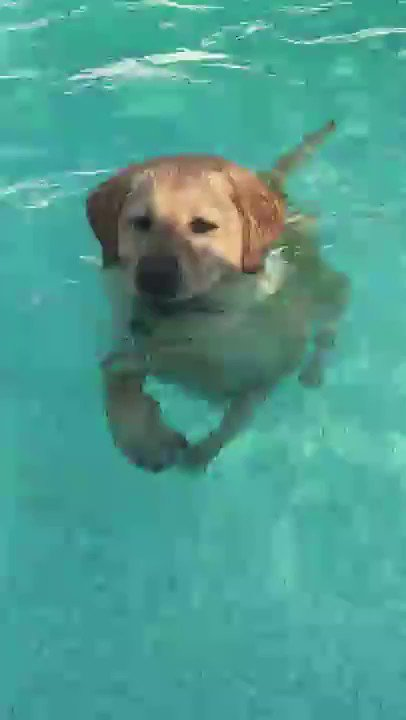

In [116]:
from IPython.display import Image
Image(filename='most_retweeted_twitter_handle.jpg', width=500) 

In [117]:
breed=list(most_retweeted['breed'])[0]
tweet_id=list(most_retweeted['tweet_id'])[0]
retweet_count=list(most_retweeted['retweet_count'])[0]
favourite_count=list(most_retweeted['favourite_count'])[0]

print("Most Retweetd '{}' breed with {} tweet id has {} retweet count & {} favorite count."
      .format(breed,tweet_id,retweet_count,favourite_count))

Most Retweetd 'Labrador Retriever' breed with 744234799360020481 tweet id has 71858 retweet count & 146597 favorite count.


In [118]:
# 2. What is the most common rating? (Top 5)
most_common_rating = twitter_archive_master['rating_numerator'].value_counts().sort_values(ascending=False)
most_common_rating.head()

12    433
10    412
11    391
13    239
9     152
Name: rating_numerator, dtype: int64

In [119]:
value=most_common_rating.index.tolist()[0]

print("Most common rating is {} which has given to {} dogs.".
      format(value,most_common_rating[value]))

Most common rating is 12 which has given to 433 dogs.


In [120]:
#3. What are the most common breeds? (Top 5)
most_common_breed = twitter_archive_master['breed'].value_counts()
most_common_breed[:5]

Golden Retriever      128
Pembroke               87
Labrador Retriever     87
Chihuahua              75
Pug                    52
Name: breed, dtype: int64

In [121]:
print("Most Common Breed is '{}' with {} count.".
      format(most_common_breed.index.tolist()[0],most_common_breed[0]))

print("Top 5 common breeds are {}.".
      format(most_common_breed.index.tolist()[:5]))

Most Common Breed is 'Golden Retriever' with 128 count.
Top 5 common breeds are ['Golden Retriever', 'Pembroke', 'Labrador Retriever', 'Chihuahua', 'Pug'].


In [122]:
#4. What is the most Popular Twitter Source?
most_popular_source = twitter_archive_master['source'].value_counts()
most_popular_source

Twitter for iPhone    1885
Twitter Web Client      26
TweetDeck               10
Name: source, dtype: int64

In [123]:
print("Most Popular Twitter Souce is '{}' with {} count.".format(most_popular_source.index.tolist()[0],most_popular_source[0]))

Most Popular Twitter Souce is 'Twitter for iPhone' with 1885 count.


In [124]:
#5a. Find out Top 5 Average Favorite Count By Dog Breed.
favorite_count=twitter_archive_master.groupby('breed')['favourite_count'].mean().sort_values(ascending=False)
favorite_count[:5]

breed
Conch        41788.0
Limousine    41262.0
Angora       41035.0
Fountain     39586.0
Bubble       35933.0
Name: favourite_count, dtype: float64

In [125]:
print("In Top 5 Average Favorite Count is '{}' for {} breed.".
      format(favorite_count[0],favorite_count.index.tolist()[0]))

print("Top 5 Average Favorite Dog Breeds by favorite count are {}.".
      format(favorite_count.index.tolist()[:5]))

In Top 5 Average Favorite Count is '41788.0' for Conch breed.
Top 5 Average Favorite Dog Breeds by favorite count are ['Conch', 'Limousine', 'Angora', 'Fountain', 'Bubble'].


In [126]:
#5b. Find out Top 5 Average Retweet Count By Dog Breed.
retweet_count=twitter_archive_master.groupby('breed')['retweet_count'].mean().sort_values(ascending=False)
retweet_count[:5]

breed
Conch      16552.0
Bubble     14181.0
Gondola    13677.0
Angora     13456.0
Beaver     13292.0
Name: retweet_count, dtype: float64

In [127]:
print("In Top 5 Average Retweet Count is '{}' for {} breed.".
      format(retweet_count[0],retweet_count.index.tolist()[0]))

print("Top 5 Average Favorite Dog Breeds by Retweet count are {}.".
      format(retweet_count.index.tolist()[:5]))

In Top 5 Average Retweet Count is '16552.0' for Conch breed.
Top 5 Average Favorite Dog Breeds by Retweet count are ['Conch', 'Bubble', 'Gondola', 'Angora', 'Beaver'].


In [128]:
#5c. Find out Top 5 Average Retweet Count By Dog Breed.
rating_numerator=twitter_archive_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False)
rating_numerator.head()

breed
Prison              14.0
Pedestal            14.0
Military Uniform    14.0
Limousine           14.0
Pole                14.0
Name: rating_numerator, dtype: float64

In [129]:
print("In Top 5 Average Rating Count is '{}' for {} breed.".
      format(rating_numerator[0],rating_numerator.index.tolist()[0]))

print("Top 5 Average Favorite Dog Breeds by Rating are {}.".
      format(rating_numerator.index.tolist()[:5]))

In Top 5 Average Rating Count is '14.0' for Prison breed.
Top 5 Average Favorite Dog Breeds by Rating are ['Prison', 'Pedestal', 'Military Uniform', 'Limousine', 'Pole'].


### Visualization 1: What is the average retweet count for each rating?

In [130]:
def plotGrapgh(title,xlabel,ylabel,xrotation):
    plt.title(title,size=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=xrotation, fontsize=16)
    plt.yticks(fontsize=16)

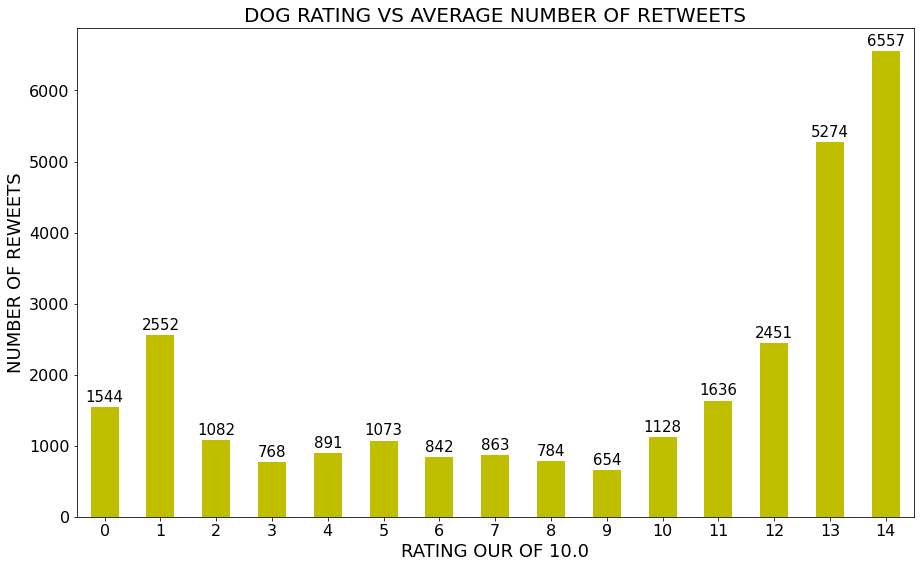

In [131]:
plt.figure(figsize = (15,9))

# Plot the results of Retweet Count
rating_mean = twitter_archive_master.groupby("rating_numerator")["retweet_count"].mean()
rating_mean.plot.bar(color="y")

# Print value on each bar
for i in range(rating_mean.shape[0]):
    if i <= 14:
        count = int(rating_mean[i])
        plt.text(i, count+250, count, ha = 'center', va='top', size=15)
        
# Customize plot title and labels
plotGrapgh("DOG RATING VS AVERAGE NUMBER OF RETWEETS",'RATING OUR OF 10.0','NUMBER OF REWEETS',0)

# Save figure
plt.savefig("Dog Rating vs Average Number of Retweets") 

# Show figure
plt.show()

###  Visualization 2 - (Top 10 Dog Breed)

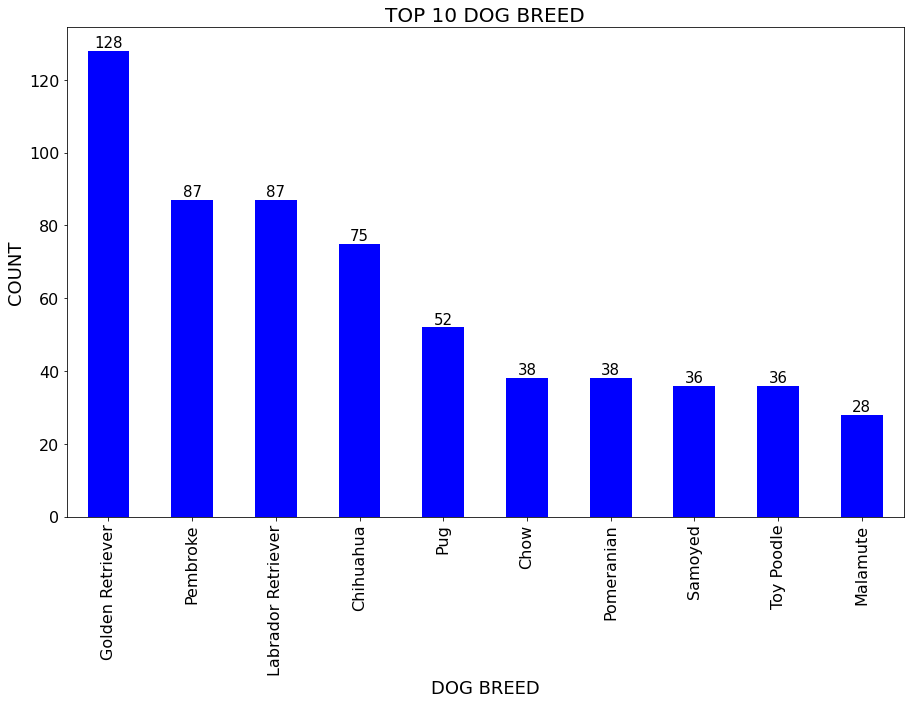

In [132]:
plt.figure(figsize = (15,9))

# Plot the results of Top 10 Dog Breed
breed_prediction_count = twitter_archive_master['breed'].value_counts().head(10)
breed_prediction_count.plot.bar(color="b")

# Print value on each bar
for i in range(breed_prediction_count.shape[0]):
    count = int(breed_prediction_count[i])
    plt.text(i, count+1, count, ha = 'center', size=15)
        
plotGrapgh("TOP 10 DOG BREED",'DOG BREED','COUNT',90)

# Save figure
plt.savefig("Top 10 Dog Breed") 

# Show figure
plt.show()

###  Visualization 3 - (Which dog breed are most rated)

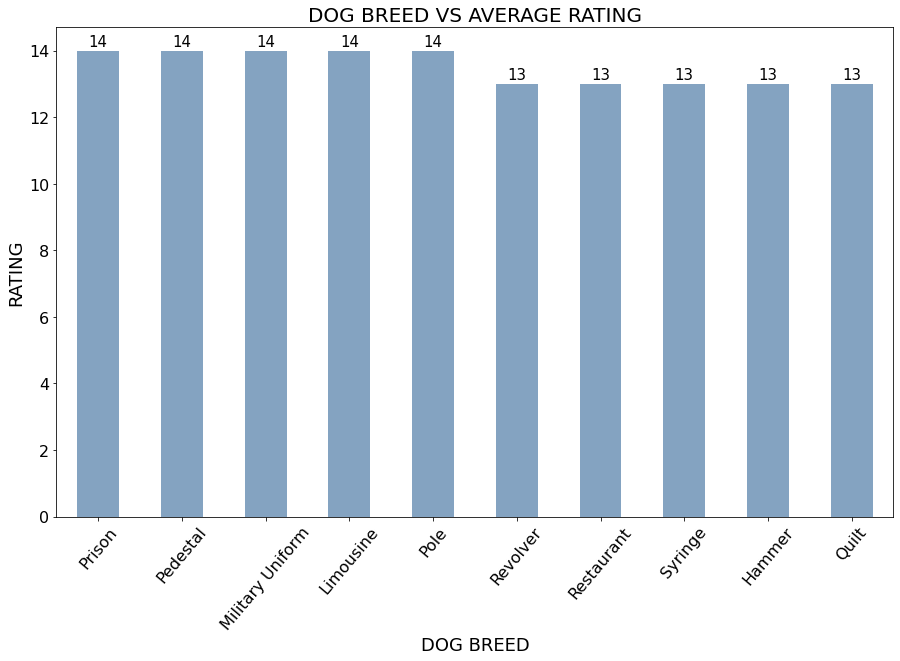

In [133]:
plt.figure(figsize = (15,9))

# Plot the results of Retweet Count
most_rated_breed =  twitter_archive_master.groupby("breed")["rating_numerator"].mean().sort_values(ascending=False).head(10)
most_rated_breed.plot.bar(color=(0.2, 0.4, 0.6, 0.6))

# Print value on each bar
for i in range(most_rated_breed.shape[0]):
    if i <= 14:
        count = int(most_rated_breed[i])
        plt.text(i, count+.5, count, ha = 'center', va='top', size=15)
        
# Customize plot title and labels
plotGrapgh("DOG BREED VS AVERAGE RATING",'DOG BREED','RATING',50)

# Save figure
plt.savefig("Most rated Dog Breed") 

# Show figure
plt.show()

###  Visualization 4 - (The most favourite dog type?)

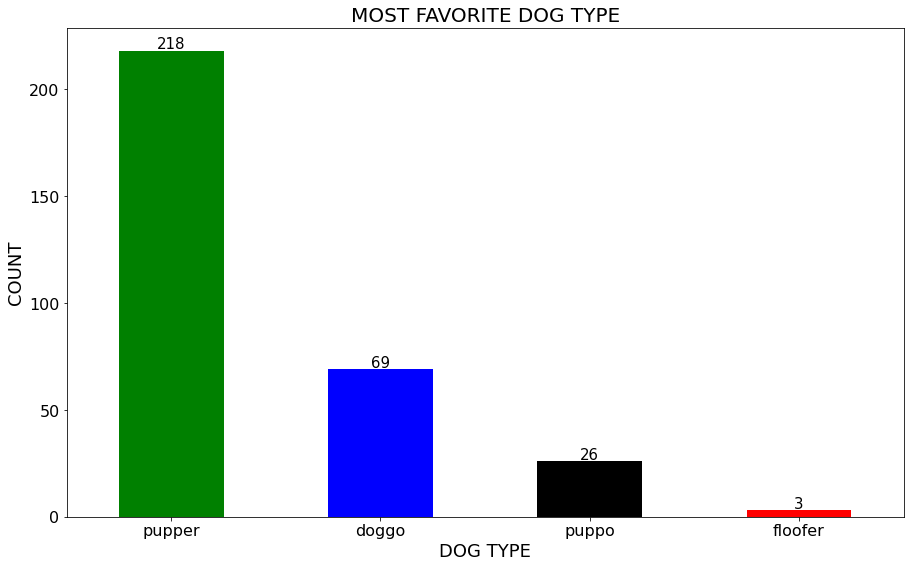

In [134]:
plt.figure(figsize = (15,9))

# Plot the results of Top 10 Dog Breed
fav_dog_type = twitter_archive_master['dog_stages'].value_counts()
fav_dog_type.plot.bar(color=['green','blue','black','red'])

# Print value on each bar
for i in range(fav_dog_type.shape[0]):
    count = int(fav_dog_type[i])
    plt.text(i, count+1, count, ha = 'center', size=15)

plotGrapgh('MOST FAVORITE DOG TYPE','DOG TYPE','COUNT',0)

# Save figure
plt.savefig("Most Favorite Dog Type") 

# Show figure
plt.show()

In [2]:
 jupyter nbconvert wrangle_act.ipynb --to pdf

SyntaxError: invalid syntax (Temp/ipykernel_12248/1253106783.py, line 1)